In [1]:
import pandas as pd

df = pd.read_csv("data/bangkok_traffy.csv")
print(df.columns)
df.head()


Index(['ticket_id', 'type', 'organization', 'comment', 'photo', 'photo_after',
       'coords', 'address', 'subdistrict', 'district', 'province', 'timestamp',
       'state', 'star', 'count_reopen', 'last_activity'],
      dtype='object')


,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,0,2022-06-04 15:34:14.609206+00
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,0,2022-06-21 08:21:09.532782+00
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52649,13.72060",191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00,เสร็จสิ้น,NaN,0,2022-06-06 01:17:12.272904+00
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53099,13.81853",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,NaN,NaN,กรุงเทพมหานคร,2021-10-14 10:45:27.713884+00,เสร็จสิ้น,NaN,0,2022-09-08 08:35:43.784519+00
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.59165,13.82280",702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 12:29:08.408763+00,เสร็จสิ้น,5.0,0,2022-08-12 07:18:44.884945+00


In [2]:
# --- Helper function to count NaNs ---
def count_nans(column):
    return df[column].isna().sum()

# Photo
# photo_na_before = count_nans('photo')
# df['photo'] = df['photo'].notna().astype(int)
# photo_na_after = count_nans('photo')
# print(f"[photo] Filled {photo_na_before - photo_na_after} missing values")

# Comment
comment_na_before = count_nans('comment')
df['comment'] = df['comment'].fillna('')
comment_na_after = count_nans('comment')
print(f"[comment] Filled {comment_na_before - comment_na_after} missing values")

# Type
type_na_before = count_nans('type')
df['type'] = df['type'].fillna('unknown')
type_na_after = count_nans('type')
print(f"[type] Filled {type_na_before - type_na_after} missing values")

# Organization
org_na_before = count_nans('organization')
df['organization'] = df['organization'].fillna('unknown')
org_na_after = count_nans('organization')
print(f"[organization] Filled {org_na_before - org_na_after} missing values")

# District
district_na_before = count_nans('district')
df['district'] = df['district'].fillna('unknown')
district_na_after = count_nans('district')
print(f"[district] Filled {district_na_before - district_na_after} missing values")

# Subdistrict
subdistrict_na_before = count_nans('subdistrict')
df['subdistrict'] = df['subdistrict'].fillna('unknown')
subdistrict_na_after = count_nans('subdistrict')
print(f"[subdistrict] Filled {subdistrict_na_before - subdistrict_na_after} missing values")

# Address
address_na_before = count_nans('address')
df['address'] = df['address'].fillna('unknown')
address_na_after = count_nans('address')
print(f"[address] Filled {address_na_before - address_na_after} missing values")

# --- Logic: address exists but district missing ---
address_notna_and_district_na = df[
    (df['address'] != 'unknown') & (df['district'] == 'unknown')
]
print(f"Rows with address but missing district: {len(address_notna_and_district_na)}")

# --- Logic: subdistrict exists but district missing ---
subdistrict_notna_and_district_na = df[
    (df['subdistrict'] != 'unknown') & (df['district'] == 'unknown')
]
print(f"Rows with subdistrict but missing district: {len(subdistrict_notna_and_district_na)}")


[comment] Filled 8772 missing values
[type] Filled 97 missing values
[organization] Filled 571 missing values
[district] Filled 561 missing values
[subdistrict] Filled 566 missing values
[address] Filled 8772 missing values
Rows with address but missing district: 560
Rows with subdistrict but missing district: 2


### every row had valid coords

In [3]:
# Step 1: Check if coords is valid lat,lon
def is_valid_latlon(coord):
    if pd.isna(coord):
        return False
    try:
        lat_str, lon_str = coord.split(',')
        float(lat_str)
        float(lon_str)
        return True
    except:
        return False

df['valid_coords'] = df['coords'].apply(is_valid_latlon)

# Print how many are valid/invalid
valid_count = df['valid_coords'].sum()
invalid_count = (~df['valid_coords']).sum()
print(f"Valid coords: {valid_count}")
print(f"Invalid coords: {invalid_count}")

# Step 2: Split valid coords into lat/lon
df.loc[df['valid_coords'], ['lat', 'lon']] = df.loc[df['valid_coords'], 'coords']\
    .str.split(',', expand=True).astype(float)
print("Extracted lat/lon for valid coords.")

# Step 3: Find rows needing reverse geocoding (has address but no coords)
needs_reverse = (~df['valid_coords']) & (df['address'] != 'unknown')
print(f"Rows that need reverse geocoding: {needs_reverse.sum()}")
# Optional: print some sample rows
print("Sample needing reverse geocoding:")
print(df[needs_reverse][['address', 'coords']].head())

# Step 4: Drop rows with no coords AND no address
to_drop = (~df['valid_coords']) & (df['address'] == 'unknown')
print(f"Rows dropped (invalid coords and no address): {to_drop.sum()}")

# Step 5: Drop rows with missing problem type
missing_type = df['type'].isna() | (df['type'].astype(str).str.strip() == '{}')
print(f"Rows dropped (missing problem type): {missing_type.sum()}")

df = df[~missing_type].reset_index(drop=True)
print(f"Remaining rows after dropping missing type: {len(df)}")


df = df[~to_drop].reset_index(drop=True)
print(f"Remaining rows after drop: {len(df)}")

Valid coords: 787026
Invalid coords: 0
Extracted lat/lon for valid coords.
Rows that need reverse geocoding: 0
Sample needing reverse geocoding:
Empty DataFrame
Columns: [address, coords]
Index: []
Rows dropped (invalid coords and no address): 0
Rows dropped (missing problem type): 115110
Remaining rows after dropping missing type: 671916


/tmp/ipykernel_70117/2635454130.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~to_drop].reset_index(drop=True)


Remaining rows after drop: 671916


In [4]:
df.drop(['valid_coords'], axis=1)

,ticket_id,type,organization,comment,photo,photo_after,coords,address,subdistrict,district,province,timestamp,state,star,count_reopen,last_activity,lat,lon
0,2021-FYJTFP,{ความสะอาด},เขตบางซื่อ,ขยะเยอะ,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53084,13.81865",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,unknown,unknown,กรุงเทพมหานคร,2021-09-03 12:51:09.453003+00,เสร็จสิ้น,NaN,0,2022-06-04 15:34:14.609206+00,NaN,NaN
1,2021-CGPMUN,"{น้ำท่วม,ร้องเรียน}","เขตประเวศ,ฝ่ายโยธา เขตประเวศ",น้ำท่วมเวลาฝนตกและทะลุเข้าบ้านเดือดร้อนมากทุกๆ...,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.66709,13.67891",189 เฉลิมพระเกียรติ ร.9 แขวง หนองบอน เขต ประเว...,หนองบอน,ประเวศ,กรุงเทพมหานคร,2021-09-19 14:56:08.924992+00,เสร็จสิ้น,4.0,0,2022-06-21 08:21:09.532782+00,NaN,NaN
2,2021-7XATFA,{สะพาน},เขตสาทร,สะพานลอยปรับปรุงไม่เสร็จตามกำหนด\nปากซอย สาทร12,https://storage.googleapis.com/traffy_public_b...,NaN,"100.52649,13.72060",191/1 ถนน สาทรเหนือ แขวง สีลม เขตบางรัก กรุงเท...,ยานนาวา,สาทร,กรุงเทพมหานคร,2021-09-26 05:03:52.594898+00,เสร็จสิ้น,NaN,0,2022-06-06 01:17:12.272904+00,NaN,NaN
3,2021-9U2NJT,{น้ำท่วม},"เขตบางซื่อ,ฝ่ายโยธา เขตบางซื่อ",น้ำท่วม,https://storage.googleapis.com/traffy_public_b...,https://storage.googleapis.com/traffy_public_b...,"100.53099,13.81853",12/14 ถนน กรุงเทพ- นนทบุรี แขวง บางซื่อ เขตบาง...,unknown,unknown,กรุงเทพมหานคร,2021-10-14 10:45:27.713884+00,เสร็จสิ้น,NaN,0,2022-09-08 08:35:43.784519+00,NaN,NaN
4,2021-DVEWYM,"{น้ำท่วม,ถนน}","เขตลาดพร้าว,ฝ่ายโยธา เขตลาดพร้าว",ซอยลาดพร้าววังหิน 75 ถนนลาดพร้าววังหิน แขวงลาด...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.59165,13.82280",702 ถ. ลาดพร้าววังหิน แขวงลาดพร้าว เขตลาดพร้าว...,ลาดพร้าว,ลาดพร้าว,กรุงเทพมหานคร,2021-12-09 12:29:08.408763+00,เสร็จสิ้น,5.0,0,2022-08-12 07:18:44.884945+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671911,KDDNBP,{ร้องเรียน},เขตหนองจอก,ศูนย์เรื่องราวร้องทุกข์ ได้รับการประสานผ่านระบ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.86304,13.85633",เขตหนองจอก กรุงเทพมหานคร : VV47+G6M แขวงกระทุ่...,กระทุ่มราย,หนองจอก,กรุงเทพมหานคร,2025-01-16 02:50:24.112172+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:50:26.781334+00,NaN,NaN
671912,RYM99G,"{ความสะอาด,ถนน}","เขตคลองสาน,ฝ่ายสิ่งแวดล้อมฯ เขตคลองสาน",ปัญหา: บริเวณตลาดพระเครื่องพญาไม้ พบร้านอาหารต...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.49651,13.73469",39 ถ. สมเด็จเจ้าพระยา แขวงสมเด็จเจ้าพระยา เขตค...,สมเด็จเจ้าพระยา,คลองสาน,กรุงเทพมหานคร,2025-01-16 02:51:28.8957+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:53:23.119455+00,NaN,NaN
671913,2025-BDQ87Y,"{ร้องเรียน,ต้นไม้,ความปลอดภัย}",เขตราชเทวี,ต้นไม้บริเวณดังกล่าวช่วงโคนต้นไม้มันแห้งเหมือน...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.53975,13.76426",10 ถ. ราชวิถี แขวงถนนพญาไท เขตราชเทวี กรุงเทพม...,ถนนพญาไท,ราชเทวี,กรุงเทพมหานคร,2025-01-16 02:52:33.878797+00,รอรับเรื่อง,NaN,0,2025-01-16 02:52:38.17364+00,NaN,NaN
671914,EZCZZU,{ถนน},เขตจอมทอง,ปัญหา: พบโรงกลึง (ไม่ทราบชื่อ) ทำงานบนพื้นผิวจ...,https://storage.googleapis.com/traffy_public_b...,NaN,"100.46226,13.67672",123 แขวงบางมด เขตจอมทอง กรุงเทพมหานคร 10150 ปร...,บางมด,จอมทอง,กรุงเทพมหานคร,2025-01-16 02:53:27.583947+00,กำลังดำเนินการ,NaN,0,2025-01-16 02:53:30.250517+00,NaN,NaN


/tmp/ipykernel_70117/2356726117.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=type_counts.head(20), x="count", y="issue_type", palette="viridis")


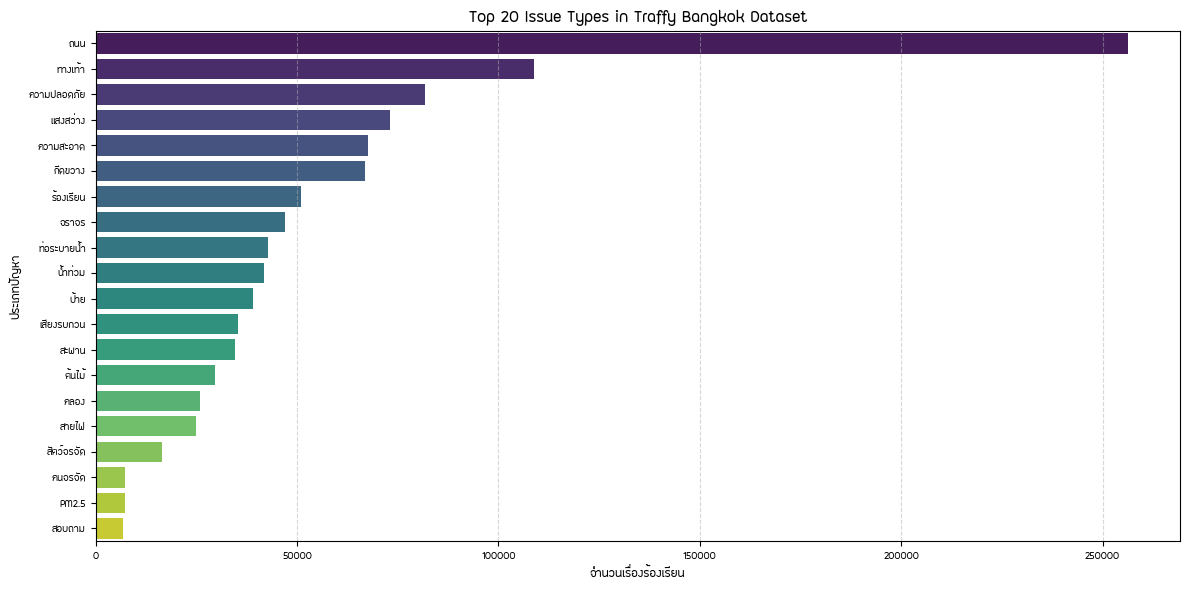

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

font_path = 'fonts/FC Lamoon Regular ver 1.00.ttf'
fc_lamoon = font_manager.FontProperties(fname=font_path)

# เตรียมข้อมูล
df["type_clean"] = df["type"].str.strip("{}").str.split(",")
df_exploded = df.explode("type_clean")
df_exploded["type_clean"] = df_exploded["type_clean"].str.strip()
type_counts = df_exploded["type_clean"].value_counts().reset_index()
type_counts.columns = ["issue_type", "count"]

# วาดกราฟ
plt.figure(figsize=(12, 6))
sns.barplot(data=type_counts.head(20), x="count", y="issue_type", palette="viridis")

plt.title("Top 20 Issue Types in Traffy Bangkok Dataset", fontproperties=fc_lamoon, fontsize=16)
plt.xlabel("จำนวนเรื่องร้องเรียน", fontproperties=fc_lamoon, fontsize=12)
plt.ylabel("ประเภทปัญหา", fontproperties=fc_lamoon, fontsize=12)

# ตั้งฟอนต์ให้กับ y-axis labels (ประเภทปัญหา)
plt.yticks(fontproperties=fc_lamoon)
plt.xticks(fontproperties=fc_lamoon)

plt.tight_layout()
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


In [6]:
df.to_csv("data/bangkok_traffy_cleaned.csv", index=False)

# convert to SQLite

In [2]:
import pandas as pd
import sqlite3

# Load your CSV
df = pd.read_csv("data/bangkok_traffy_cleaned.csv", low_memory=False)

# Connect to (or create) SQLite DB
conn = sqlite3.connect("data/traffy.db")

# Write to SQLite (replace 'reports' with any table name you want)
df.to_sql("traffy", conn, if_exists="replace", index=False)

# Close connection
conn.close()


In [3]:
# Load your CSV
df = pd.read_csv("data/cleaned_budgets.csv", low_memory=False)

# Connect to (or create) SQLite DB
conn = sqlite3.connect("data/budgets.db")

# Write to SQLite (replace 'reports' with any table name you want)
df.to_sql("budgets", conn, if_exists="replace", index=False)

# Close connection
conn.close()
